# Lab-03-1 Minimizing Cost show graph

In [ ]:
%tensorflow_version 1.x
import tensorflow as tf
import matplotlib.pyplot as plt
tf.set_random_seed(777)  # for reproducibility

## X and Y data

In [ ]:
X = [1, 2, 3]
Y = [1, 2, 3]

## Variable

In [ ]:
W = tf.placeholder(tf.float32)

## Our Model

In [ ]:
# Our hypothesis for linear model X * W (Simplified)
hypothesis = X * W

# cost/loss function
# tf.reduce_mean, 축(0 열, 1 행, default 전체)에 따른 평균
cost = tf.reduce_mean(tf.square(hypothesis - Y)) 

## Prepare session

In [ ]:
# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

## Get Cost

In [ ]:
# Variables for plotting cost function
W_history = []
cost_history = []

for i in range(-30, 50):
    curr_W = i * 0.1 # -3 ~ 5 사이
    curr_cost = sess.run(cost, feed_dict={W: curr_W})
    W_history.append(curr_W)
    cost_history.append(curr_cost)

## Show graph

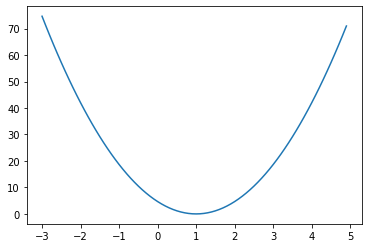

In [ ]:
# Show the cost function (convex)
plt.plot(W_history, cost_history)
plt.show()

# Lab-03-2 Minimizing Cost Gradinet Update

## X and Y data

In [ ]:
x_data = [1, 2, 3]
y_data = [1, 2, 3]

## Variable

In [ ]:
# Try to find values for W and b to compute y_data = W * x_data + b
# We know that W should be 1 and b should be 0
# But let's use TensorFlow to figure it out
W = tf.Variable(tf.random_normal([1]), name='weight') # 랜덤값 지정

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

## Our Model

In [ ]:
# Our hypothesis for linear model X * W
hypothesis = X * W

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

## Minimize

In [ ]:
# Minimize: Gradient Descent using derivative: W -= learning_rate * derivative
learning_rate = 0.1
gradient = tf.reduce_mean((W * X - Y) * X)
descent = W - learning_rate * gradient
update = W.assign(descent)

## Prepare session

In [ ]:
# Launch the graph in a session
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

## Fit the line

In [ ]:
for step in range(21):
    sess.run(update, feed_dict={X: x_data, Y: y_data})
    print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}), sess.run(W))

0 0.81561834 [0.58193856]
1 0.23199801 [0.7770339]
2 0.06599057 [0.88108474]
3 0.018770663 [0.9365785]
4 0.0053392053 [0.9661752]
5 0.0015187055 [0.9819601]
6 0.00043198955 [0.99037874]
7 0.00012287527 [0.9948687]
8 3.4951463e-05 [0.9972633]
9 9.941011e-06 [0.99854046]
10 2.8278303e-06 [0.99922156]
11 8.043332e-07 [0.99958485]
12 2.2878868e-07 [0.99977857]
13 6.507735e-08 [0.9998819]
14 1.8488208e-08 [0.99993706]
15 5.2511346e-09 [0.99996644]
16 1.4921397e-09 [0.9999821]
17 4.2443085e-10 [0.99999046]
18 1.2039081e-10 [0.99999493]
19 3.389407e-11 [0.9999973]
20 9.549694e-12 [0.99999857]


# Lab-03-3 Minimizing Cost TF Optimizer

## X and Y data

In [ ]:
# tf Graph Input
X = [1, 2, 3]
Y = [1, 2, 3]

## Variable

In [ ]:
# Set wrong model weights
W = tf.Variable(5.0) # 5로도 실험

## Our Model

In [ ]:
# Linear model
hypothesis = X * W

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

## Minimize

In [ ]:
# Minimize: Gradient Descent Magic
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(cost)

## Prepare session

In [ ]:
# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

## Fit the line

In [ ]:
for step in range(10):
    print(step, sess.run(W))
    sess.run(train)

0 5.0
1 1.2666664
2 1.0177778
3 1.0011852
4 1.000079
5 1.0000052
6 1.0000004
7 1.0
8 1.0
9 1.0


```
0 -3.0
1 0.7333336
2 0.98222226
3 0.9988148
4 0.99992096
5 0.9999947
6 0.99999964
7 0.99999994
8 1.0
9 1.0
```

# Lab-03-X Minimizing Cost TF Optimizer

## X and Y data

In [ ]:
# tf Graph Input
X = [1, 2, 3]
Y = [1, 2, 3]

## Variable

In [ ]:
# Set wrong model weights
W = tf.Variable(5.)

## Our Model

In [ ]:
# Linear model
hypothesis = X * W

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

## Minimize

In [ ]:
# Manual gradient
gradient = tf.reduce_mean((W * X - Y) * X) * 2

In [ ]:
# Minimize: Gradient Descent Magic
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)

train = optimizer.minimize(cost)

In [ ]:
# Get gradients
gvs = optimizer.compute_gradients(cost, [W])

# Optional: modify gradient if necessary, 이 과정 사이에서 필요시 기울기 계산을 수동으로 조정해줄 수 있음.
# gvs = [(tf.clip_by_value(grad, -1., 1.), var) for grad, var in gvs]

# Apply gradients
apply_gradients = optimizer.apply_gradients(gvs)

## Prepare session

In [ ]:
# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

## Fit the line

In [ ]:
# apply_gradients는 optimizer를 통해서 구현
# gradient는 따로 manual하게 구현됨
# 그런데 cost를 minimize 하는 것은 결국 optimizer고, 가중치 조정도 optimizer의 계산
# gradient는 단순히 조정된 값을 받아서 기울기를 계산해내고, 비교

for step in range(100):
    print(step, sess.run([gradient, W, gvs]))
    sess.run(apply_gradients)
    # Same as sess.run(train)

0 [37.333332, 5.0, [(37.333336, 5.0)]]
1 [33.84889, 4.6266665, [(33.84889, 4.6266665)]]
2 [30.689657, 4.2881775, [(30.689657, 4.2881775)]]
3 [27.825287, 3.9812808, [(27.825287, 3.9812808)]]
4 [25.228262, 3.703028, [(25.228262, 3.703028)]]
5 [22.873621, 3.4507453, [(22.873623, 3.4507453)]]
6 [20.738752, 3.2220092, [(20.73875, 3.2220092)]]
7 [18.803137, 3.0146217, [(18.803137, 3.0146217)]]
8 [17.048176, 2.8265903, [(17.048176, 2.8265903)]]
9 [15.457013, 2.6561086, [(15.457014, 2.6561086)]]
10 [14.014359, 2.5015385, [(14.01436, 2.5015385)]]
11 [12.706352, 2.361395, [(12.706352, 2.361395)]]
12 [11.520427, 2.2343314, [(11.520427, 2.2343314)]]
13 [10.445186, 2.119127, [(10.445185, 2.119127)]]
14 [9.470302, 2.0146751, [(9.470302, 2.0146751)]]
15 [8.586407, 1.9199722, [(8.586407, 1.9199722)]]
16 [7.785009, 1.8341081, [(7.785009, 1.8341081)]]
17 [7.0584083, 1.756258, [(7.0584083, 1.756258)]]
18 [6.399624, 1.685674, [(6.399624, 1.685674)]]
19 [5.8023257, 1.6216778, [(5.8023252, 1.6216778)]]
20 [